# REGRESSION LINEAITRE MULTIPLE

### Chargement du DataFrame final après les deux prémières étapes:
#### 1 - Exploration des données + DATAVIZ
#### 2 - Preprocessing

In [1]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 2.0.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [71]:
df_reg = pd.read_csv('Co2_final.csv', header=0)
display(df_reg.head())

,Mp,T,Ct,m (kg),Ewltp (g/km),W (mm),At1 (mm),Ft,Fm,ec (cm3),ep (KW),Fuel consumption
0,0.148938,0.003688,M1,993.0,117.0,2492.0,1455.0,petrol,M,999.0,48.0,5.2
1,0.148938,0.003688,M1,993.0,117.0,2492.0,1455.0,petrol,M,999.0,48.0,5.2
2,0.148938,0.003688,M1,993.0,117.0,2492.0,1455.0,petrol,M,999.0,48.0,5.2
3,0.148938,0.003688,M1,993.0,117.0,2492.0,1455.0,petrol,M,999.0,48.0,5.2
4,0.148938,0.003688,M1,993.0,117.0,2492.0,1455.0,petrol,M,999.0,48.0,5.2


In [72]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498786 entries, 0 to 3498785
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Mp                 float64
 1   T                  float64
 2   Ct                 object 
 3   m (kg)             float64
 4   Ewltp (g/km)       float64
 5   W (mm)             float64
 6   At1 (mm)           float64
 7   Ft                 object 
 8   Fm                 object 
 9   ec (cm3)           float64
 10  ep (KW)            float64
 11  Fuel consumption   float64
dtypes: float64(9), object(3)
memory usage: 320.3+ MB


In [73]:
# Affichage du denombrement ds differentes modalités sur les variables "Ct", "Ft", "Fm".
display("Les modalités de la variable conditions_meteo sont : ", df_reg['Ct'].value_counts(), '\n')
display("Les modalités de la variable vacances sont : ", df_reg['Ft'].value_counts(), '\n')
display("Les modalités de la variable saison sont : ", df_reg['Fm'].value_counts(), '\n')

'Les modalités de la variable conditions_meteo sont : '

M1     3327296
M1G     171468
N1          20
N1G          2
Name: Ct, dtype: int64

'\n'

'Les modalités de la variable vacances sont : '

petrol             2070326
diesel              851293
petrol/electric     454315
lpg                  61779
e85                  35891
diesel/electric      23208
ng                    1974
Name: Ft, dtype: int64

'\n'

'Les modalités de la variable saison sont : '

M    2134257
H     813082
P     477523
B      61786
F      12138
Name: Fm, dtype: int64

'\n'

In [74]:
# Variables catégorielles disponibles dans le df
variables_categorielles = ['Ct', 'Ft', 'Fm']

# Effectuer le one-hot encoding
df_encoded = pd.get_dummies(df_reg, columns=variables_categorielles)

# Afficher les premières lignes du dataframe pour vérifier
display(df_encoded.head())

,Mp,T,m (kg),Ewltp (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),Fuel consumption,Ct_M1,...,Ft_e85,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_B,Fm_F,Fm_H,Fm_M,Fm_P
0,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,1,...,0,0,0,1,0,0,0,0,1,0
1,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,1,...,0,0,0,1,0,0,0,0,1,0
2,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,1,...,0,0,0,1,0,0,0,0,1,0
3,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,1,...,0,0,0,1,0,0,0,0,1,0
4,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,1,...,0,0,0,1,0,0,0,0,1,0


In [75]:
#Valeurs manquantes

df_encoded.isnull().sum()

Mp                    0
T                     0
m (kg)                0
Ewltp (g/km)          0
W (mm)                0
At1 (mm)              0
ec (cm3)              0
ep (KW)               0
Fuel consumption      0
Ct_M1                 0
Ct_M1G                0
Ct_N1                 0
Ct_N1G                0
Ft_diesel             0
Ft_diesel/electric    0
Ft_e85                0
Ft_lpg                0
Ft_ng                 0
Ft_petrol             0
Ft_petrol/electric    0
Fm_B                  0
Fm_F                  0
Fm_H                  0
Fm_M                  0
Fm_P                  0
dtype: int64

# Analyse sur la base finale

In [76]:
# Résumé statistique des variables
df_encoded.describe()

,Mp,T,m (kg),Ewltp (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),Fuel consumption,Ct_M1,...,Ft_e85,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_B,Fm_F,Fm_H,Fm_M,Fm_P
count,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,...,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06,3.498786e+06
mean,1.680257e-01,1.434661e-02,1.505278e+03,1.251754e+02,2.680036e+03,1.553655e+03,1.591434e+03,1.103278e+02,5.351559e+00,9.509859e-01,...,1.025813e-02,1.765727e-02,5.641957e-04,5.917270e-01,1.298493e-01,1.765927e-02,3.469203e-03,2.323897e-01,6.099993e-01,1.364825e-01
std,9.599866e-02,1.607522e-02,3.251205e+02,4.701375e+01,1.574364e+02,5.299200e+01,5.393261e+02,5.361963e+01,2.001486e+00,2.158976e-01,...,1.007616e-01,1.317023e-01,2.374611e-02,4.915142e-01,3.361376e-01,1.317096e-01,5.879769e-02,4.223563e-01,4.877502e-01,3.433002e-01
min,9.524381e-03,2.839330e-07,9.150000e+02,1.200000e+01,2.250000e+03,1.035000e+03,8.750000e+02,4.400000e+01,5.000000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.469239e-02,4.975357e-03,1.263000e+03,1.150000e+02,2.583000e+03,1.518000e+03,1.199000e+03,7.500000e+01,4.800000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.489384e-01,8.129001e-03,1.451000e+03,1.280000e+02,2.670000e+03,1.559000e+03,1.498000e+03,1.000000e+02,5.500000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.938415e-01,1.787472e-02,1.701000e+03,1.450000e+02,2.730000e+03,1.585000e+03,1.968000e+03,1.210000e+02,6.300000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2.938415e-01,6.637359e-02,4.255000e+03,4.560000e+02,4.490000e+03,2.700000e+03,6.749000e+03,5.740000e+02,2.010000e+01,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Distribution des variables

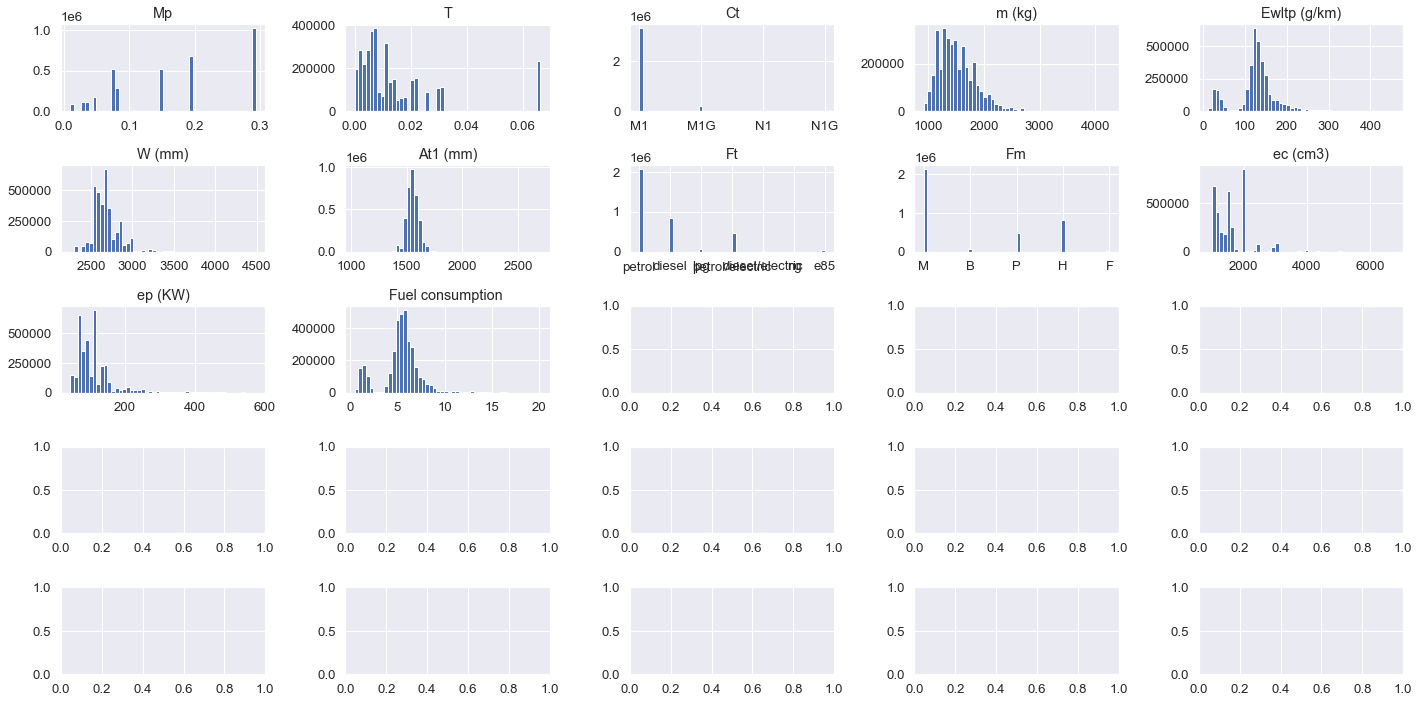

In [104]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(5, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(df_reg):
    axs[i].hist(df_reg[column], bins=50)
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

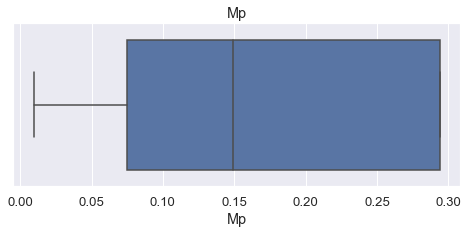

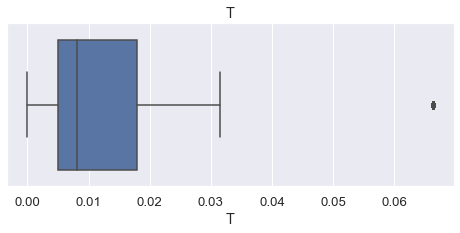

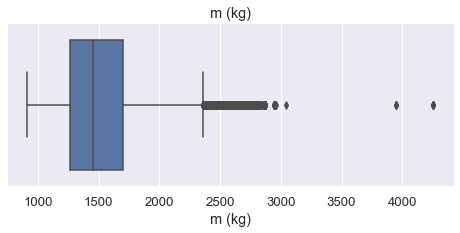

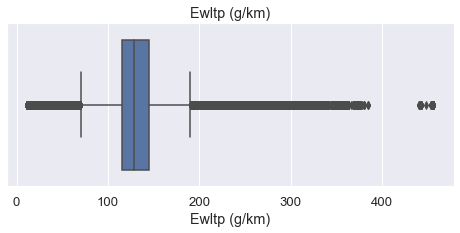

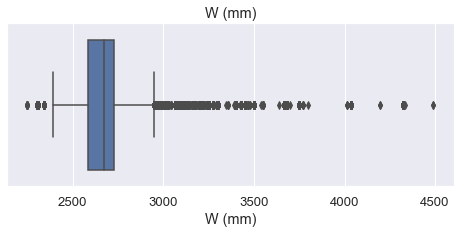

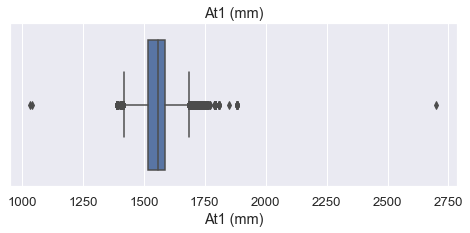

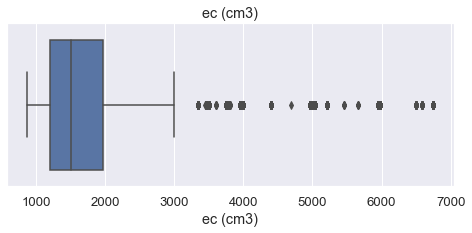

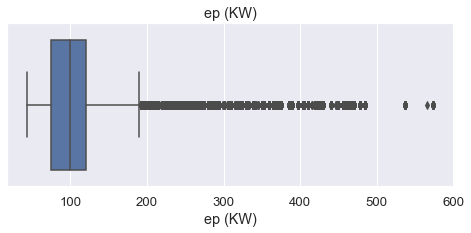

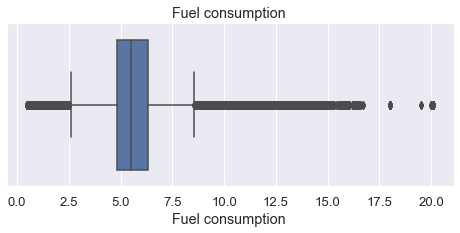

In [101]:
import seaborn as sns

# Tracé des boxplots pour chaque variable
for column in df_encoded.select_dtypes(include=["float64", "int64"]):
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=df_encoded[column], ax=ax)
    plt.title(column)
    plt.show()

# Corrélation entre les variables

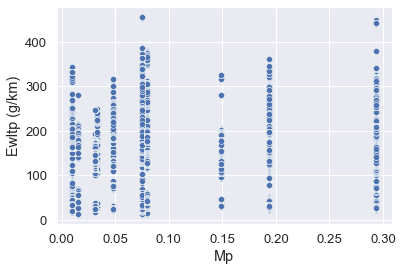

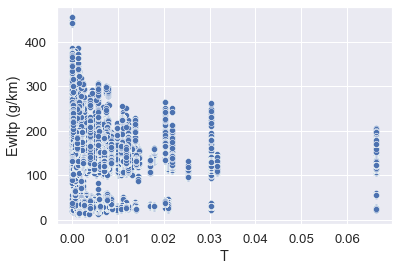

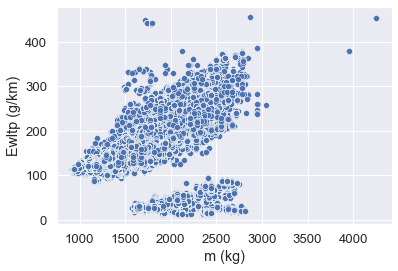

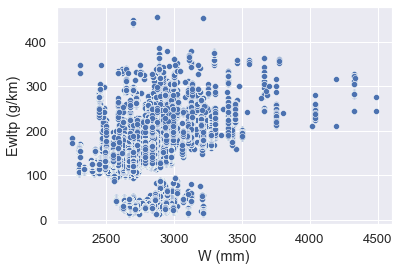

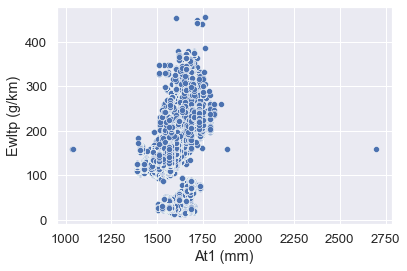

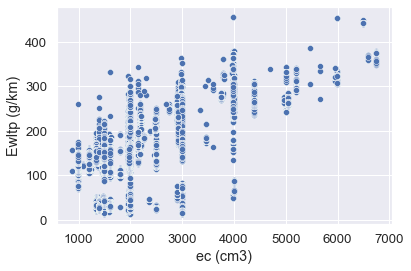

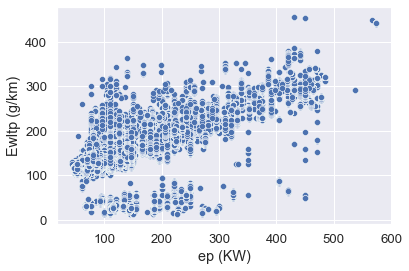

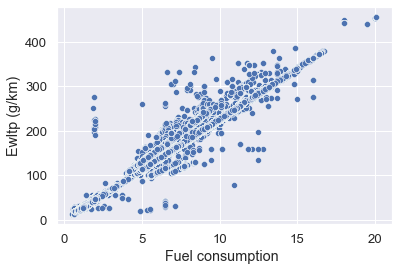

In [100]:
# Extraction des colonnes de variables explicatives
X = df_encoded.drop(columns=['Ewltp (g/km)'])

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.select_dtypes(include=["float64", "int64"]).columns:
    sns.scatterplot(x=X[col], y = df_encoded['Ewltp (g/km)'])
    plt.show()

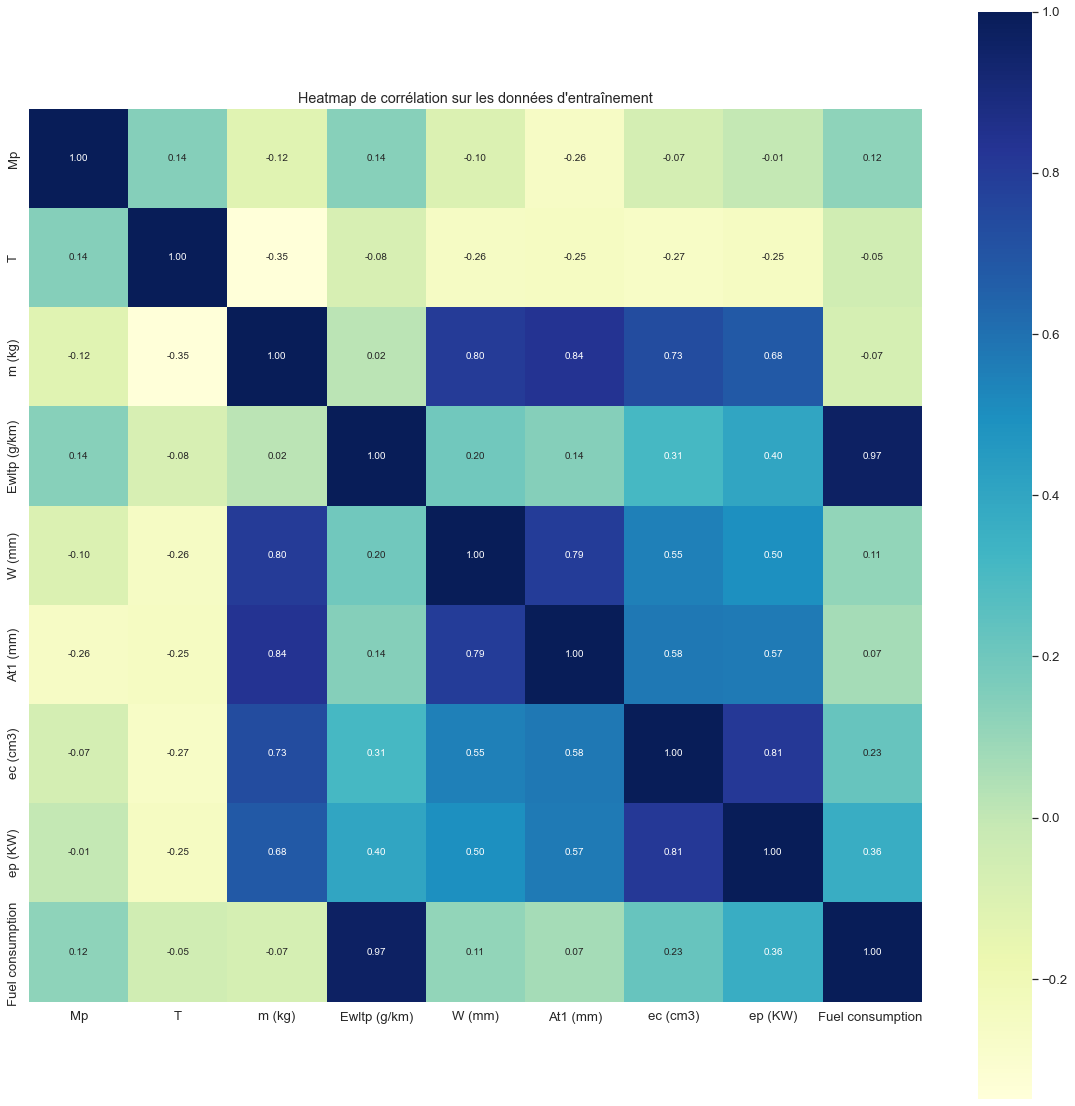

In [79]:
# Calcul de la matrice de corrélation
corr_matrix = df_reg.corr()


sns.set(font_scale=1.2)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, square=True, fmt=".2f")

# Affichage du graphique
import matplotlib.pyplot as plt

plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()

In [80]:
# Extraction des variables ayant une corrélation supérieure à 0.8 avec la variable d'intérêt
corr_threshold = 0.8
corr_vars = corr_matrix[abs(corr_matrix['Ewltp (g/km)']) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.8 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.8 avec la variable d'intérêt (Ewltp (g/km)) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.8 avec la variable d'intérêt (Ewltp (g/km)) :

['Ewltp (g/km)', 'Fuel consumption ']


In [81]:
# Extraction des variables ayant une corrélation supérieure à -0.8 avec la variable d'intérêt
corr_threshold = -0.8
corr_vars = corr_matrix[abs(corr_matrix['Ewltp (g/km)']) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à -0.8 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.8 avec la variable d'intérêt (Ewltp (g/km)) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.8 avec la variable d'intérêt (Ewltp (g/km)) :

[]


In [82]:
# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

m (kg) - W (mm)
m (kg) - At1 (mm)
Ewltp (g/km) - Fuel consumption 
W (mm) - m (kg)
At1 (mm) - m (kg)
ec (cm3) - ep (KW)
ep (KW) - ec (cm3)
Fuel consumption  - Ewltp (g/km)


In [83]:
# Extraction des couples de variables ayant une corrélation inférieure à -0.8
corr_threshold = -0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) < corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation inférieure à -0.8
print("Couples de variables ayant une corrélation inférieure à -0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation inférieure à -0.8 :



# Modélisation sur la base

### Création des jeux de données d'entrainement et des jeux de données de test

In [84]:
X = df_encoded.drop(columns=['Ewltp (g/km)']) # Les variables explicatives
y = df_encoded['Ewltp (g/km)']   # La variable cible

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles de données résultants
print("Dimensions de X_train : ", X_train.shape)
print("Dimensions de X_test : ", X_test.shape)
print("Dimensions de y_train : ", y_train.shape)
print("Dimensions de y_test : ", y_test.shape)

Dimensions de X_train :  (2799028, 24)
Dimensions de X_test :  (699758, 24)
Dimensions de y_train :  (2799028,)
Dimensions de y_test :  (699758,)


#### Mettre à l'échelle des différentes valeurs

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# Instancier le régresseur
lr = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
# Afficher l'intercept
print(f"Intercept: {lr.intercept_}")

# Afficher les coefficients
print(f"Coefficients: {lr.coef_}")

Intercept: -428689500993.2696
Coefficients: [-6.51684692e-01 -2.90201450e-01  1.75128134e+01  4.80104755e+00
 -1.89321240e+01 -7.21673401e+00 -6.26423392e+00  4.60086425e+02
  9.77586975e+10  9.77586975e+10  9.77586975e+10  9.77586975e+10
  8.59466638e+11  2.52202513e+11  8.59466638e+11  8.59466638e+11
  8.59466638e+11  8.59466638e+11  2.52202513e+11 -5.28535834e+11
 -5.28535834e+11 -5.28535834e+11 -5.28535834e+11  7.87282908e+10]


In [88]:
# Afficher le score (R²) sur l'échantillon d'apprentissage
train_score = lr.score(X_train, y_train)
print(f"R² score sur l'échantillon d'apprentissage: {train_score:.4f}")

# Afficher les scores obtenus par validation croisée
cv_scores = cross_val_score(lr, X_train, y_train, cv=4, scoring='r2')
print(f"Scores de validation croisée (R²): {cv_scores}")

# Afficher la moyenne et l'écart type des scores de validation croisée
print(f"Moyenne des scores de validation croisée (R²): {cv_scores.mean():.4f}")
print(f"Écart type des scores de validation croisée (R²): {cv_scores.std():.4f}")

R² score sur l'échantillon d'apprentissage: 0.9971
Scores de validation croisée (R²): [0.99712298 0.99692115 0.99712773 0.99707316]
Moyenne des scores de validation croisée (R²): 0.9971
Écart type des scores de validation croisée (R²): 0.0001


In [89]:
# Afficher le score (R²) du modèle sur l'ensemble de test
test_score = lr.score(X_test, y_test)
print(f"R² score sur l'ensemble de test: {test_score:.4f}")

R² score sur l'ensemble de test: 0.9971


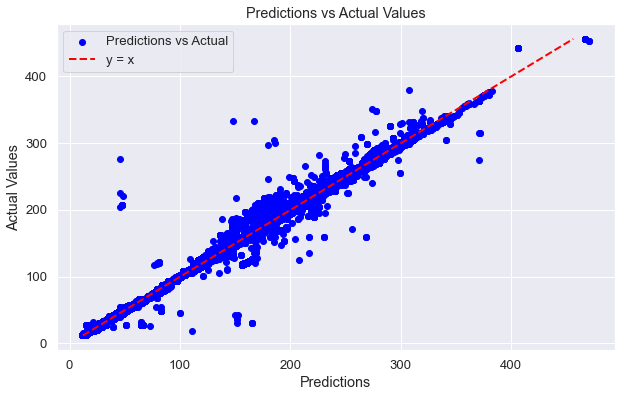

In [42]:
# Stocker les prédictions du modèle pour X_test dans pred_test
pred_test = lr.predict(X_test)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(pred_test, y_test, color='blue', label='Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='y = x')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

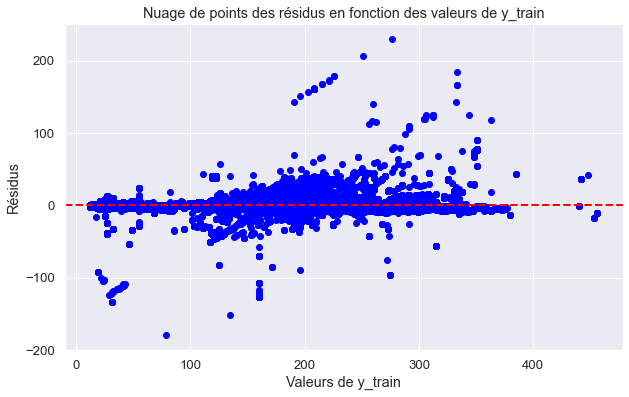

In [90]:
# Calculer les valeurs ajustées (pred_train)
pred_train = lr.predict(X_train)

# Calculer les résidus
residus = y_train - pred_train

# Afficher le nuage de points représentant les résidus en fonction des valeurs de y_train
plt.figure(figsize=(10, 6))
plt.scatter(y_train, residus, color='blue')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Valeurs de y_train')
plt.ylabel('Résidus')
plt.title('Nuage de points des résidus en fonction des valeurs de y_train')
plt.grid(True)
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error
print("rmse train :", np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))

rmse train : 2.5491077803341233
rmse test : 2.5098670537737284


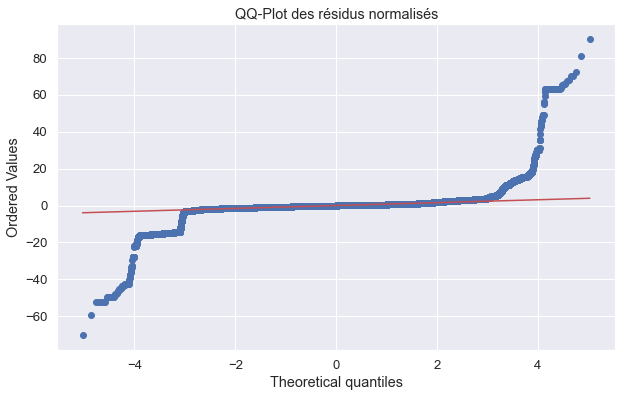

In [92]:
# Centrer et réduire les résidus
residus_mean = np.mean(residus)
residus_std = np.std(residus)
residus_norm = (residus - residus_mean) / residus_std

# Afficher le QQ-Plot des résidus normalisés
plt.figure(figsize=(10, 6))
stats.probplot(residus_norm, dist="norm", plot=plt)
plt.title('QQ-Plot des résidus normalisés')
plt.grid(True)
plt.show()

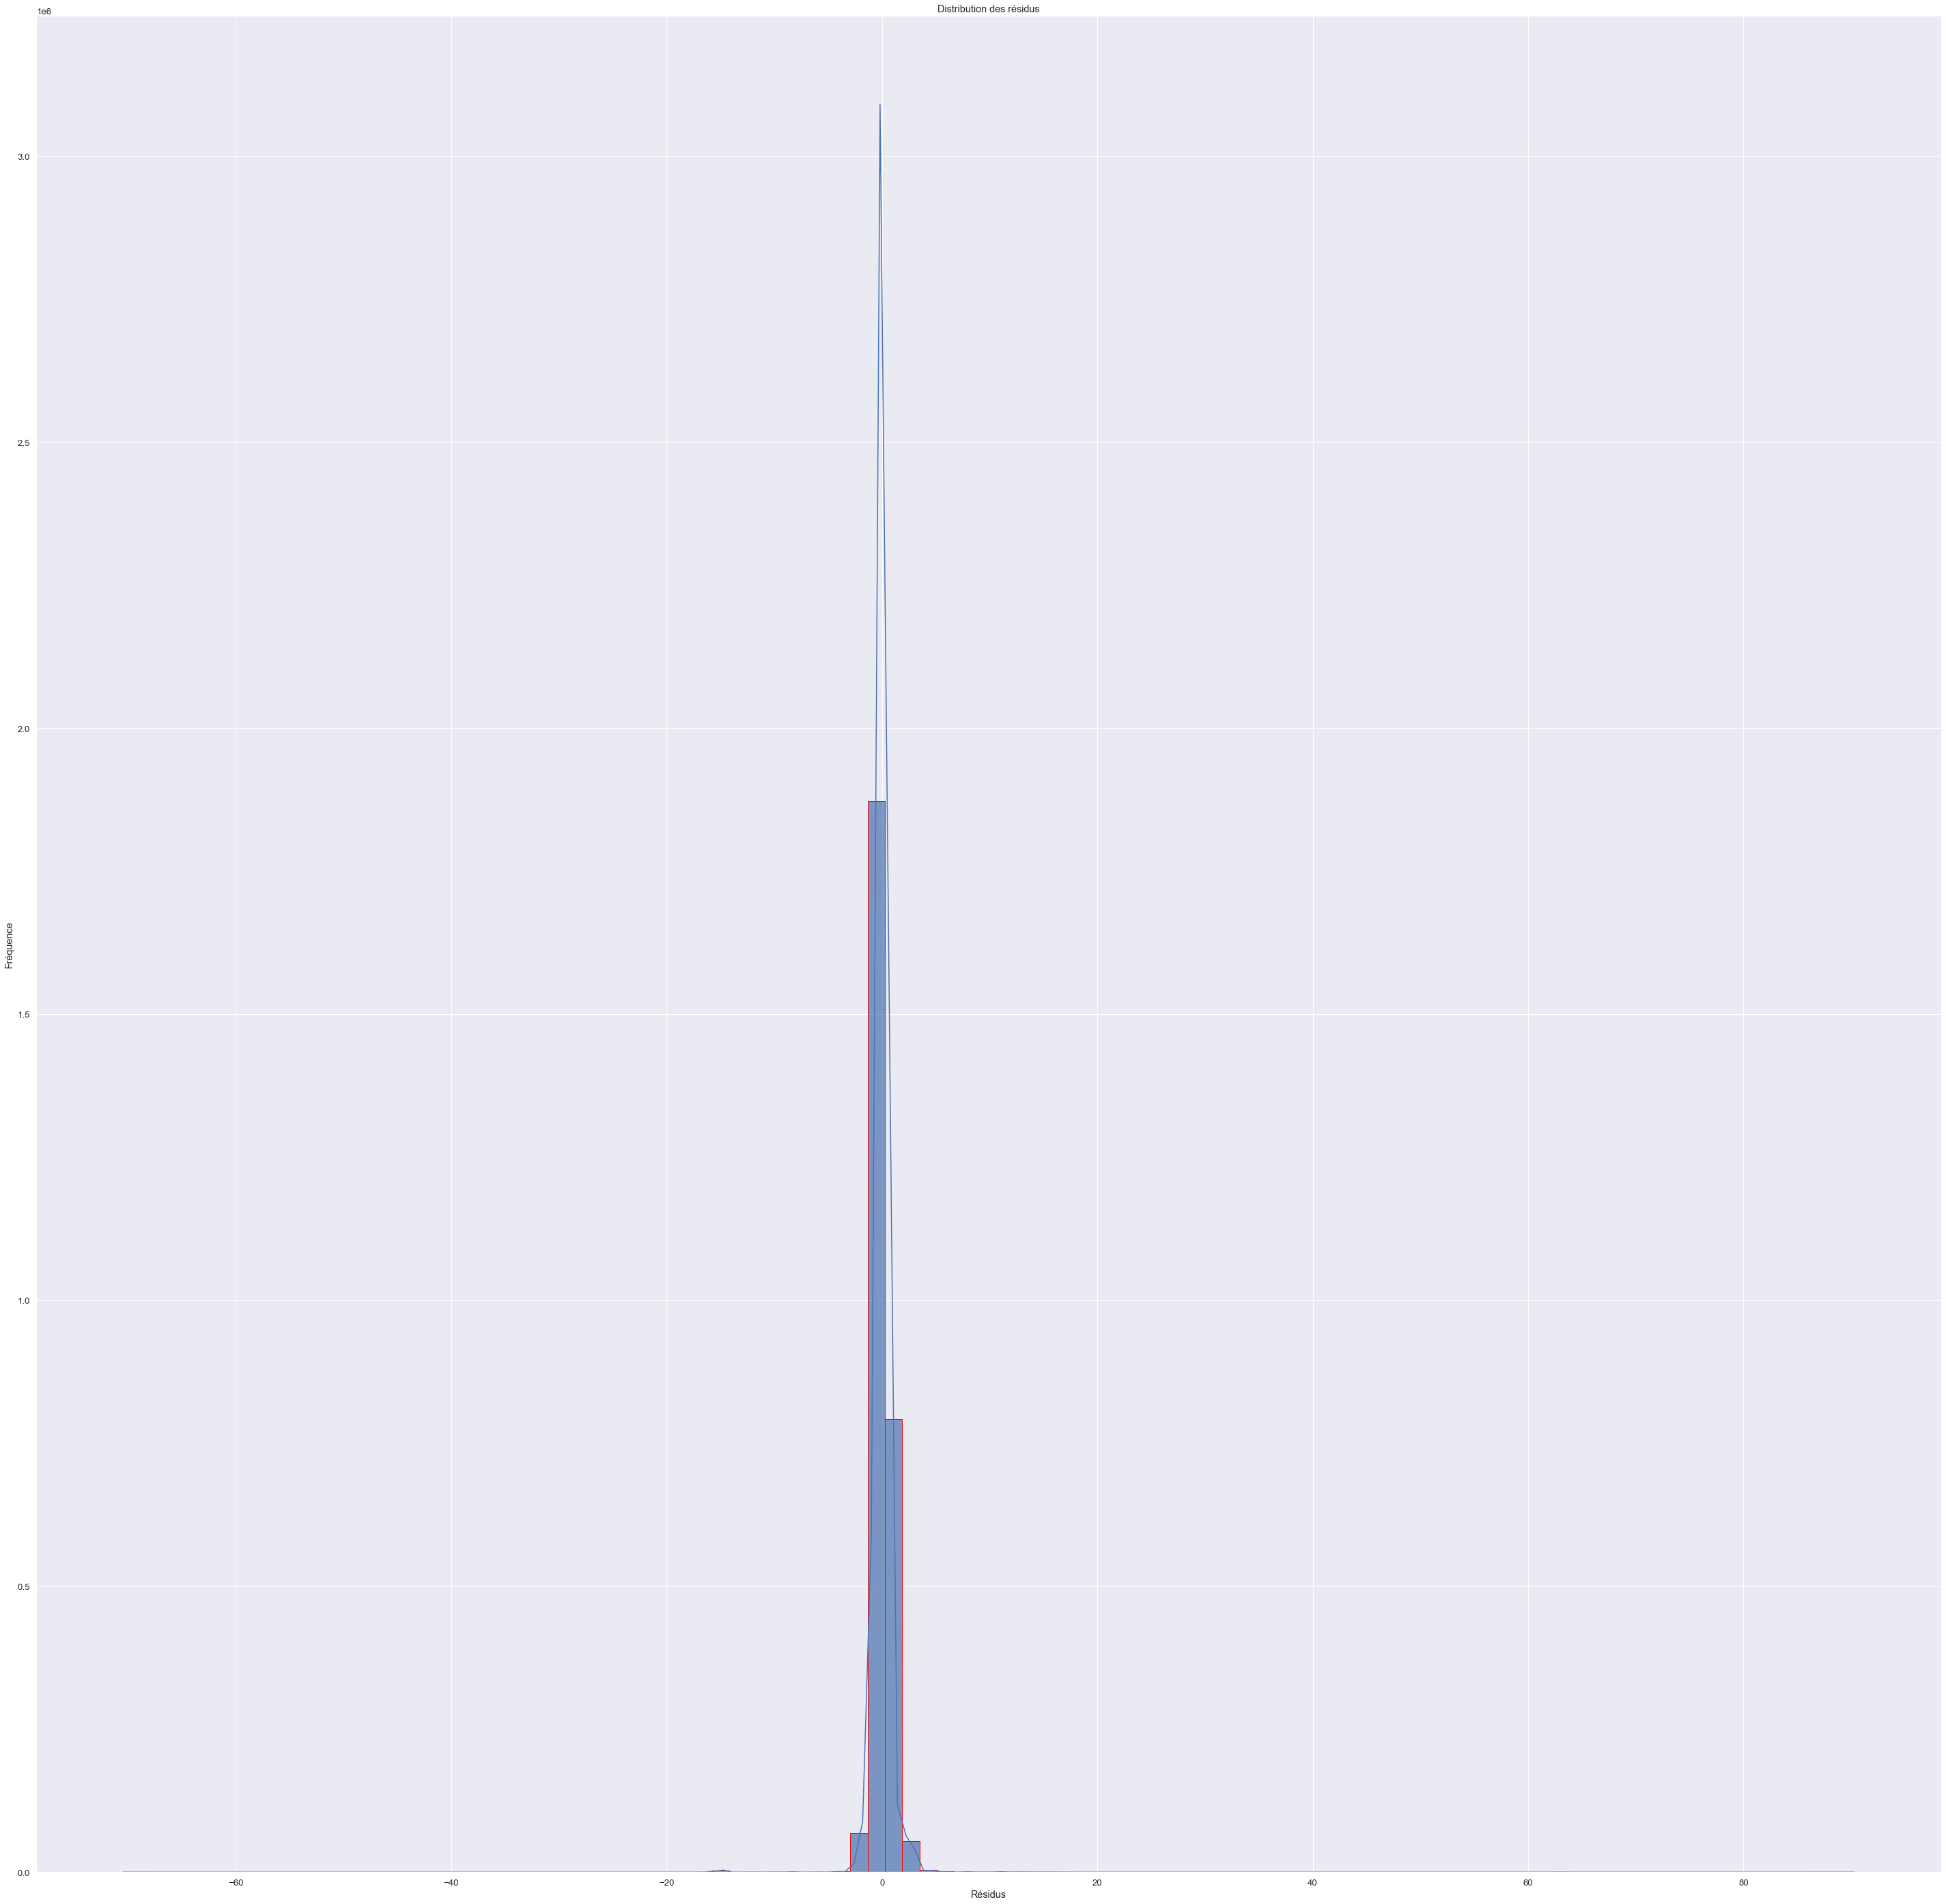

In [93]:
# Tracer l'histogramme des résidus normalisés
plt.figure(figsize=(50, 50))
sns.histplot(residus_norm, bins=100, edgecolor='red', kde=True, alpha=0.7)

# Ajouter les détails du graphique
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Interprtabilité des modèles

## II - Interpretabilité locale

L'interprétabilité locale des modèles consite en un ensemble de techniques destinées à répondre à des questions telles ques :

Pourquoi le modèle a -t- il fait cette prédiction ?
Quel a été l'impact de cette valeur de caracterisique spécifique sur la prédiction?

## II - 1 LIME

LIME est une technique qui permet un modèle simple autour de la prédiction que nous voulons expliquer et utilise ce modèle simple pour donner une explication . LIME peut être utilisé avec n'importe modèle de machine learning, pas seulement avec des arbres de décision ou de forêts aléatoires.

L'idée de base de LIME est assez simple. Pour une prédiction observée, LIME perturbe les entrées de la prédiction et essaie de comprendre comment ces perturbations affectent la sortie du modèle. Les attributs qui affectent le plus la sortie lorqu'ils sont considérés comme ayant une importance élévée pour cette prédiction spécifique.

In [55]:
# pip install lime --user

In [105]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [106]:
# Création de l'explainer
explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns.tolist(),
                                 class_names=['Ewltp (g/km)'],
                                 mode='regression')

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [110]:
display(X_train)

array([[1.        , 0.104644  , 0.0757485 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.08089783, 0.23353293, ..., 0.        , 1.        ,
        0.        ],
       [0.24498297, 0.12867251, 0.31437126, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.12246967, 0.1257485 , ..., 1.        , 0.        ,
        0.        ],
       [0.08082335, 0.09275594, 0.06736527, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.08010215, 0.15389222, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
# Choix d'une exemple spécificque à expliquer
i = X_test.iloc[0].values

# exp = explainer.explain_instance(X_test.values[i], y_test_pred, num_features = 5)
exp = explainer.explain_instance(i, pred_test)
# Afficher l'explication
exp.show_in_notebook(show_table=True)